In [1]:
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
train_df = pd.read_csv('train.csv', index_col='id')
test_df = pd.read_csv('test.csv', index_col='id')

target = 'defects'
cat_features = []
num_features = test_df.columns

# Data Description

In [3]:
train_df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
id,,,,,,,,,,,,,,,,,,,,,
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


## Shape and Columns

In [4]:
print('Train Descriptors')
print(f'Shape: {train_df.shape}')
print(f'Columns : {train_df.columns}')
print('')
print('Test Descriptors')
print(f'Shape: {test_df.shape}')
print(test_df.columns)

Train Descriptors
Shape: (101763, 22)
Columns : Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects'],
      dtype='object')

Test Descriptors
Shape: (67842, 21)
Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
      dtype='object')


## Missing Values

In [12]:
null_values = {'column': [], 'train_null_values': [], 'test_null_values': []}

for col in test_df.columns:
    train_col_null = train_df[col].isna().sum()
    test_col_null = test_df[col].isna().sum()
    
    null_values['column'].append(col)
    null_values['train_null_values'].append(train_col_null)
    null_values['test_null_values'].append(test_col_null)

null_values = pd.DataFrame(null_values)
null_values['train_total'] = train_df.shape[0]
null_values['test_total'] = test_df.shape[0]
null_values['train_null_perc'] = null_values['train_null_values'] / null_values['train_total']
null_values['test_null_perc'] = null_values['test_null_values'] / null_values['test_total']
null_values.sort_values(by='train_null_perc', inplace=True, ascending=False)

null_values

,column,train_null_values,test_null_values,train_total,test_total,train_null_perc,test_null_perc
0,loc,0,0,101763,67842,0.0,0.0
11,t,0,0,101763,67842,0.0,0.0
19,total_Opnd,0,0,101763,67842,0.0,0.0
18,total_Op,0,0,101763,67842,0.0,0.0
17,uniq_Opnd,0,0,101763,67842,0.0,0.0
16,uniq_Op,0,0,101763,67842,0.0,0.0
15,locCodeAndComment,0,0,101763,67842,0.0,0.0
14,lOBlank,0,0,101763,67842,0.0,0.0
13,lOComment,0,0,101763,67842,0.0,0.0
12,lOCode,0,0,101763,67842,0.0,0.0


In [17]:
null_values_per_row = train_df.isna().sum(axis=1)
pd.DataFrame(null_values_per_row.value_counts().sort_index())

,count
0,101763


In [19]:
missing_values = {'column': [], 'only_in_train': [], 'only_in_test': []}

for col in test_df.columns:
    train_col_unique = train_df[col].unique()
    test_col_unique = test_df[col].unique()
    
    missing_values['column'].append(col)
    missing_values['only_in_train'].append([f for f in train_col_unique if f not in test_col_unique])
    missing_values['only_in_test'].append([f for f in test_col_unique if f not in train_col_unique])

missing_values = pd.DataFrame(missing_values)
missing_values

,column,only_in_train,only_in_test
0,loc,"[591.0, 619.0, 483.0, 428.0, 220.0, 806.0, 567...","[332.0, 390.0, 254.0, 605.0, 787.0, 1124.0, 18..."
1,v(g),"[111.0, 80.0, 110.0, 65.0, 54.0, 81.0, 112.0, ...","[123.0, 173.0, 197.0, 470.0]"
2,ev(g),"[111.0, 48.0, 112.0, 77.0, 67.0, 95.0, 133.0]","[122.0, 68.0, 90.0]"
3,iv(g),"[39.0, 66.0, 223.0, 48.0, 65.0, 112.0, 81.0, 8...","[86.0, 88.0, 147.0]"
4,n,"[464.0, 776.0, 681.0, 489.0, 608.0, 927.0, 125...","[861.0, 603.0, 1072.0, 1532.0, 701.0, 1320.0, ..."
5,v,"[70.28, 1246.06, 3177.38, 1286.99, 891.66, 580...","[1534.72, 14034.82, 2728.32, 223.62, 4233.2, 2..."
6,l,[0.48],[]
7,d,"[7.72, 23.69, 29.59, 7.42, 9.51, 59.68, 24.32,...","[34.44, 33.58, 26.11, 42.69, 24.54, 26.24, 28...."
8,i,"[43.43, 28.23, 118.54, 52.08, 39.45, 71.09, 22...","[30.55, 65.96, 7.32, 15.82, 132.89, 20.13, 96...."
9,e,"[3772.51, 14942.9, 144.43, 2538.89, 18383.2, 2...","[205782.65, 6730.73, 3024.82, 46500.05, 20328...."


# Exploratory Data Analysis

## Variable Distribution

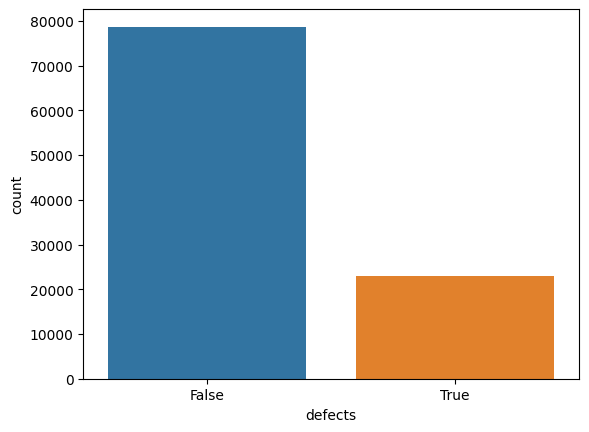

In [21]:
sns.countplot(data=train_df, x=target)
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=len(cat_features)//3 + 1, ncols=3, figsize=(30,30))
axs = axs.flatten()

for i, feat in enumerate(cat_features):
    sns.countplot(data=train_df, x=feat, ax=axs[i])
plt.show()

In [24]:
fig, axs = plt.subplots(nrows=len(num_features)//3 + 1, ncols=3, figsize=(15,30))
axs = axs.flatten()

for i, feat in enumerate(num_features):
    sns.histplot(data=train_df, x=feat, ax=axs[i])
plt.show()

KeyboardInterrupt: 